In [33]:
import pandas as pd
import os

# Importa las librerías necesarias de scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define la ruta del archivo de datos limpios
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
file_path = os.path.join(project_dir, 'data', 'processed', 'clean_pubmed_articles.csv')
print(f"Cargando datos limpios desde: {file_path}")

# Carga los datos preprocesados en un DataFrame
df = pd.read_csv(file_path)

# --- Vectorización de los datos ---
# Crea un vectorizador para convertir los textos en números
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
# 'fit_transform' aprende el vocabulario y transforma los datos
data_vectorized = vectorizer.fit_transform(df['clean_abstract'])

# --- Entrenamiento del modelo LDA ---
# Crea el modelo LDA. Puedes cambiar 'n_components' para el número de temas que quieres.
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
# Entrena el modelo
lda.fit(data_vectorized)

# --- Impresión de los temas ---
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTema #{topic_idx+1}:")
        # Imprime las palabras más importantes de cada tema
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Extrae las palabras clave del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Imprime los temas y sus palabras clave
print_top_words(lda, feature_names, 10)

Cargando datos limpios desde: c:\Users\nijak\Desktop\GitHub\scientific-lit-mining\data\processed\clean_pubmed_articles.csv

Tema #1:
drug delivery nanoparticle target therapeutic application nps release review property

Tema #2:
typically relatively rationale inject depot depend likely combine injection remain

Tema #3:
formulation hypertension adsorption multiple elimination inject pathogen difficulty enter like

Tema #4:
sln slns nonspecific nm prevent biodistribution hypertension failure paper pulmonary

Tema #5:
skin formulation trial magnetic penetration nanoparticle uptake cargo liver pathological


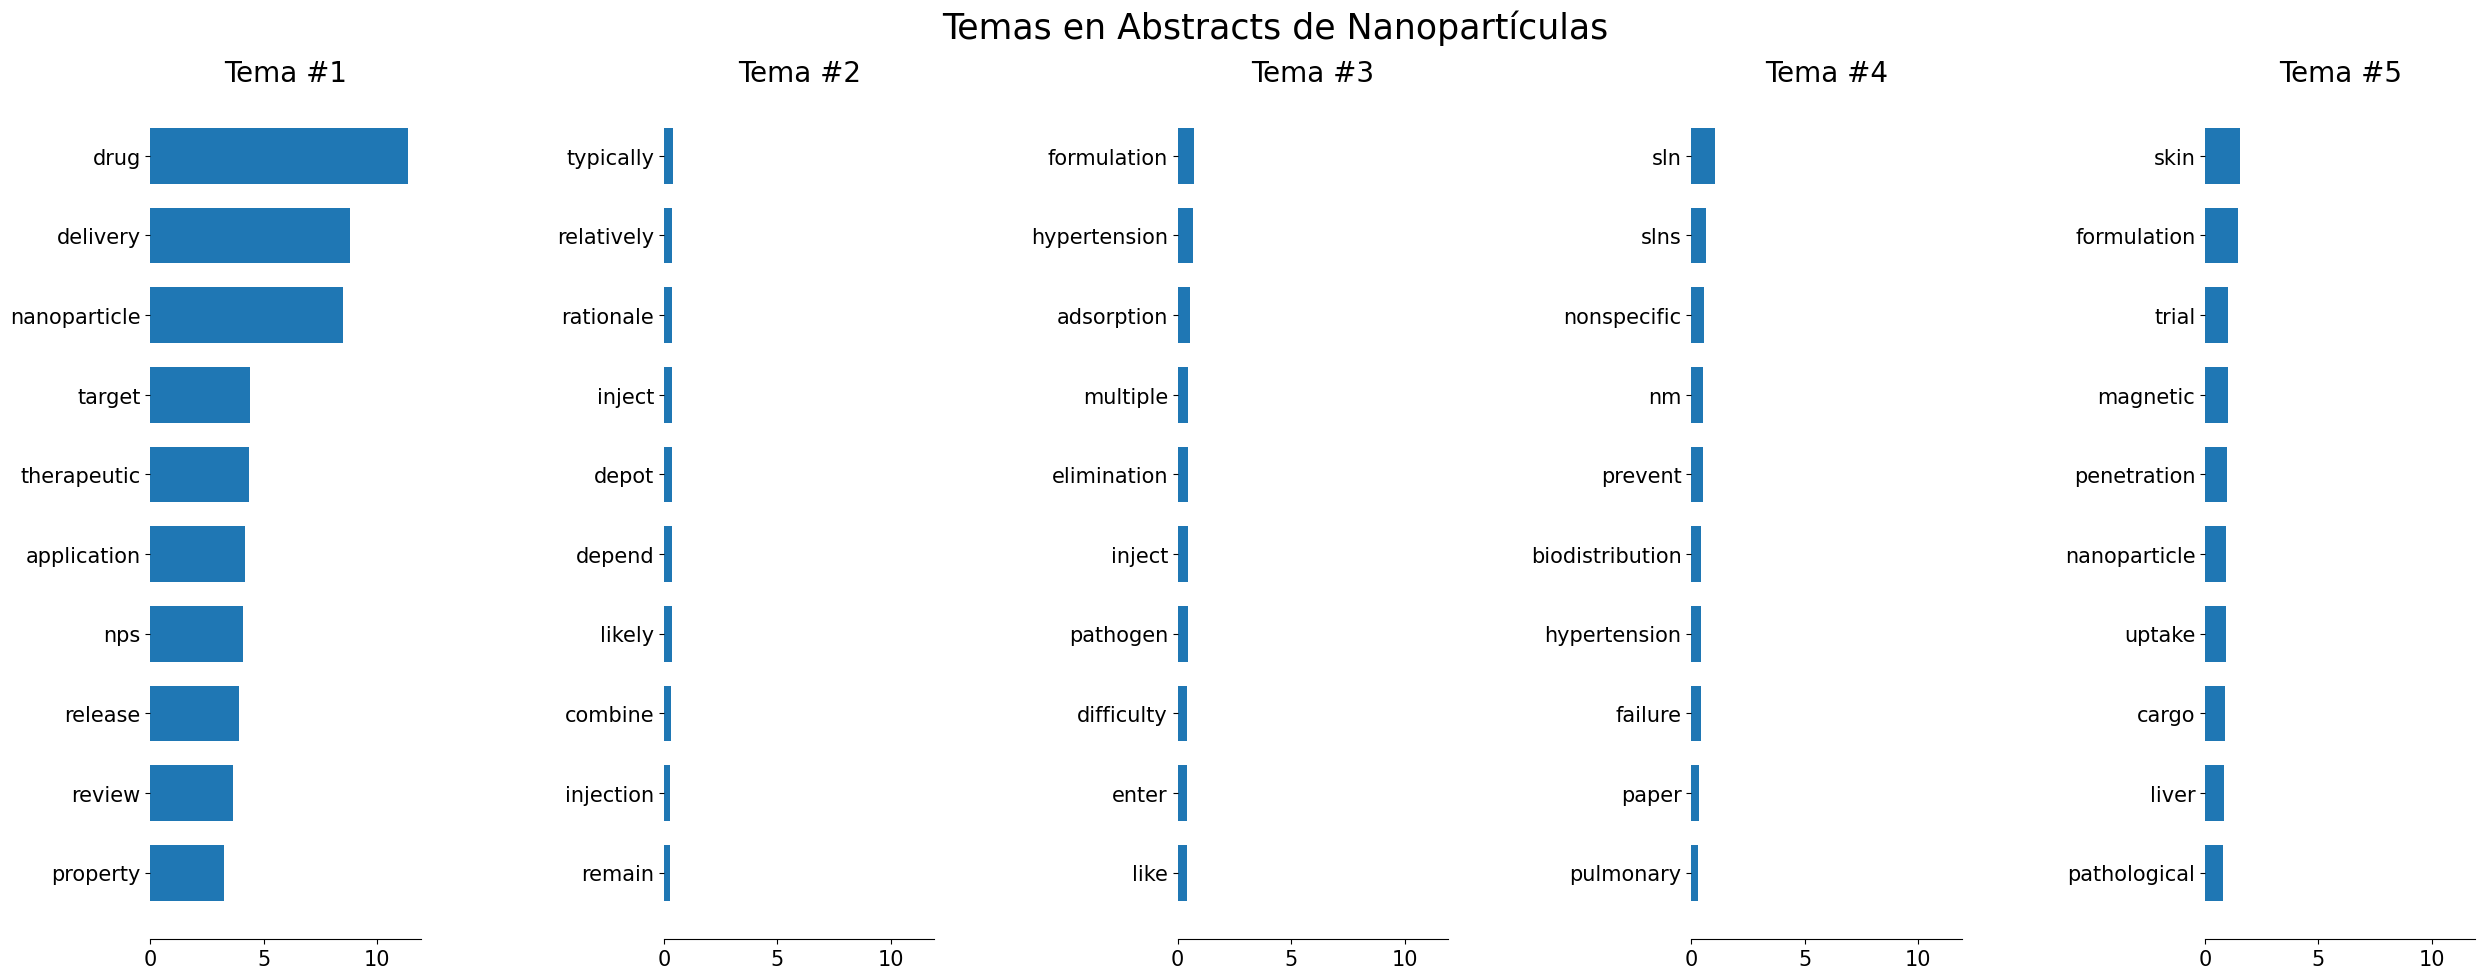

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# --- Visualización de los temas ---
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        ax = axes[topic_idx]
        # Obtiene las palabras clave y sus pesos
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = [topic[i] for i in top_features_ind]
        
        # Crea el gráfico de barras
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Tema #{topic_idx + 1}', fontdict={'fontsize': 20})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=15)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
    
    fig.suptitle(title, fontsize=25)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90)
    plt.show()

# Llama a la función para visualizar los temas
plot_top_words(lda, feature_names, 10, 'Temas en Abstracts de Nanopartículas')

In [35]:
# Asigna el tema más probable a cada documento
topic_probabilities = lda.transform(data_vectorized)
# np.argmax encuentra el índice del valor más alto en cada fila
most_likely_topic = np.argmax(topic_probabilities, axis=1)

# Añade la columna de temas al DataFrame original
df['topic'] = most_likely_topic

# Muestra el número de artículos por cada tema
print("\nConteo de artículos por tema:")
print(df['topic'].value_counts().sort_index())

# Muestra los primeros 5 artículos con su tema asignado
print("\nPrimeros 5 artículos con su tema:")
print(df[['title', 'topic']].head())

# Guarda el DataFrame actualizado con los temas
final_data_path = os.path.join(project_dir, 'data', 'processed', 'articles_with_topics.csv')
df.to_csv(final_data_path, index=False)
print(f"\nDataFrame actualizado guardado en: {final_data_path}")


Conteo de artículos por tema:
topic
0    93
2     1
4     1
Name: count, dtype: int64

Primeros 5 artículos con su tema:
                                               title  topic
0  Drug delivery and nanoparticles:applications a...      0
1  Engineering precision nanoparticles for drug d...      0
2         Polymeric Nanoparticles for Drug Delivery.      0
3  Drug-delivery nanoparticles for bone-tissue an...      0
4  Nano-drug co-delivery system of natural active...      0

DataFrame actualizado guardado en: c:\Users\nijak\Desktop\GitHub\scientific-lit-mining\data\processed\articles_with_topics.csv


In [36]:
import pandas as pd
import os

# Define la ruta del archivo de datos con temas
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
file_path = os.path.join(project_dir, 'data', 'processed', 'articles_with_topics.csv')

# Carga el DataFrame
df = pd.read_csv(file_path)

# --- Filtra el DataFrame por un tema específico ---
# Vamos a filtrar por el Tema #4 (recuerda que los temas van del 0 al 4)
selected_topic = 0
filtered_df = df[df['topic'] == selected_topic]

print(f"Total de artículos para el Tema #{selected_topic}: {len(filtered_df)}")

# Muestra los 3 primeros artículos de este tema
print("\nPrimeros 3 títulos para el tema seleccionado:")
print(filtered_df[['title', 'topic', 'clean_abstract']].head(3))

# Filtra los artículos que son del Tema #0 Y contienen la palabra 'cancer' en el título
filtered_by_topic_and_keyword = df[(df['topic'] == 0) & (df['title'].str.contains('cancer', case=False))]

print(f"Total de artículos sobre cáncer en el Tema #0: {len(filtered_by_topic_and_keyword)}")

# Muestra los títulos de los artículos filtrados
print(filtered_by_topic_and_keyword[['title', 'topic']].head())

Total de artículos para el Tema #0: 93

Primeros 3 títulos para el tema seleccionado:
                                               title  topic  \
0  Drug delivery and nanoparticles:applications a...      0   
1  Engineering precision nanoparticles for drug d...      0   
2         Polymeric Nanoparticles for Drug Delivery.      0   

                                      clean_abstract  
0  use nanotechnology medicine specifically drug ...  
1  recent year development nanoparticle expand br...  
2  recent emergence nanomedicine revolutionize th...  
Total de artículos sobre cáncer en el Tema #0: 10
                                                title  topic
4   Nano-drug co-delivery system of natural active...      0
16  Applications of nanoparticles for diagnosis an...      0
42  Nanomedicine for drug delivery and imaging: a ...      0
47  CARBON DOTS: Bioimaging and Anticancer Drug De...      0
51  Recent Advances in Nanoparticle-Based Cancer D...      0


Número de artículos en el conjunto filtrado: 10


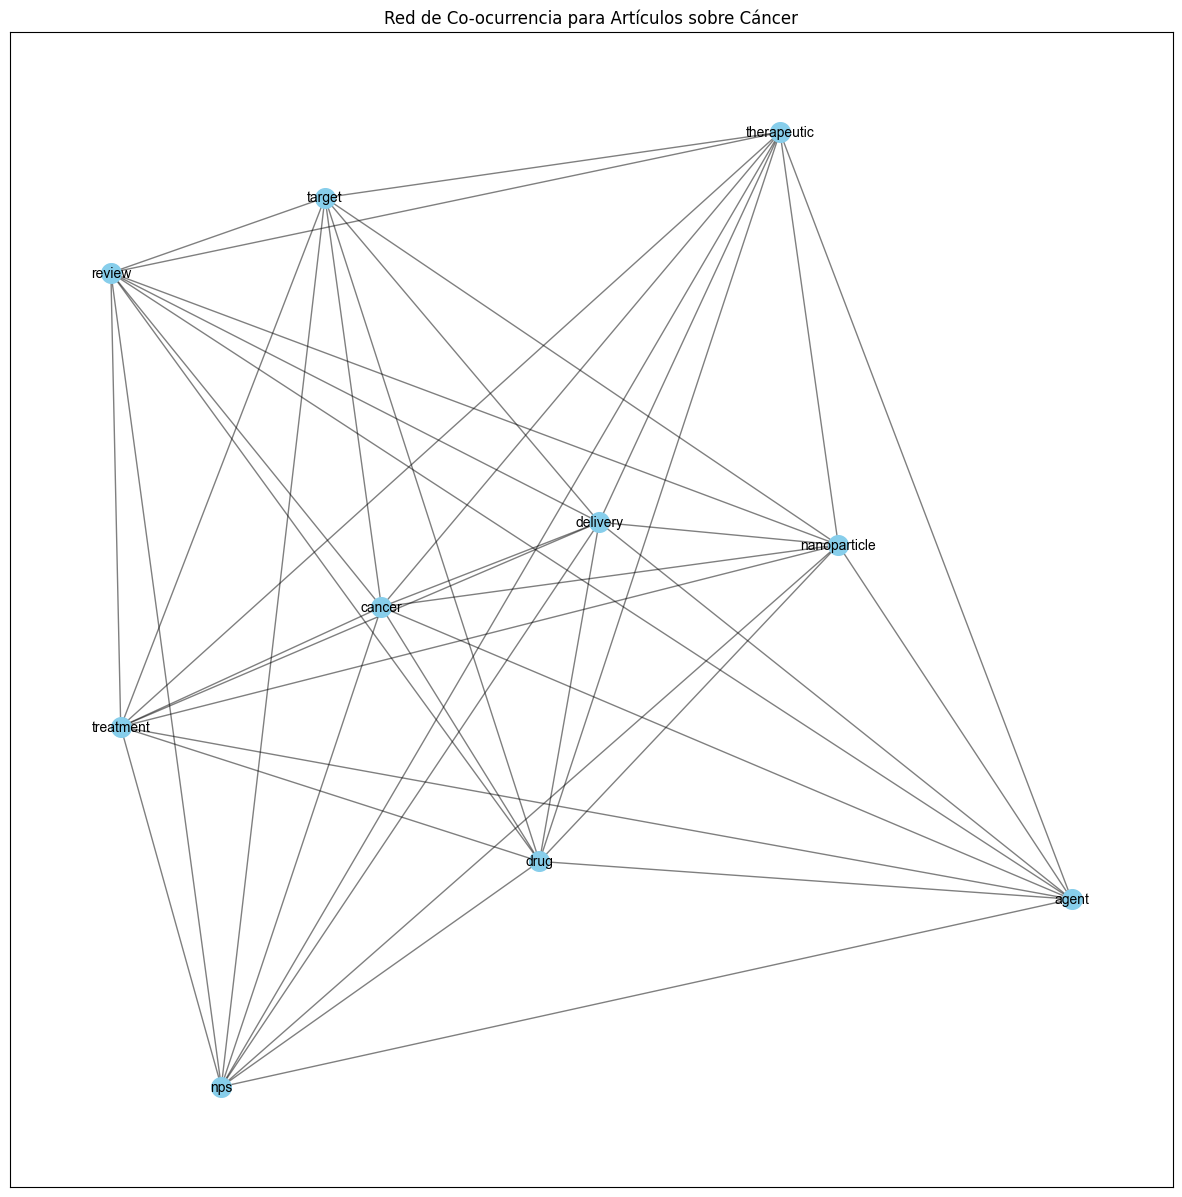

In [37]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Carga de nuevo el DataFrame por si acaso la variable no está en memoria
# Este código se lo puedes añadir al inicio de tu cuaderno
# if 'df' not in locals():
#     project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
#     file_path = os.path.join(project_dir, 'data', 'processed', 'articles_with_topics.csv')
#     df = pd.read_csv(file_path)

# 1. Filtramos los datos de nuevo, esta vez para nuestro análisis de red
filtered_df = df[(df['topic'] == 0) & (df['title'].str.contains('cancer', case=False))]
print(f"Número de artículos en el conjunto filtrado: {len(filtered_df)}")

# 2. Crea un nuevo vectorizador que limite el número de palabras clave
#    Hemos limitado a las 50 palabras más comunes en el conjunto filtrado
vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(filtered_df['clean_abstract'])
feature_names = vectorizer.get_feature_names_out()

# 3. Crea la matriz de co-ocurrencia
co_occurrence_matrix = (word_counts.T * word_counts)
co_occurrence_matrix.setdiag(0)

# 4. Crea el gráfico de red
G = nx.from_scipy_sparse_array(co_occurrence_matrix)
G = nx.relabel_nodes(G, {i: word for i, word in enumerate(feature_names)})

# Filtra las conexiones (bordes) para que el gráfico sea más claro
edges_to_keep = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] > 1]
G_filtered = nx.Graph()
G_filtered.add_edges_from(edges_to_keep)

# 5. Visualiza el gráfico
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G_filtered, k=0.5, iterations=50) 
nx.draw_networkx_nodes(G_filtered, pos, node_size=200, node_color='skyblue')
nx.draw_networkx_edges(G_filtered, pos, alpha=0.5)
nx.draw_networkx_labels(G_filtered, pos, font_size=10, font_family="Arial")
plt.title('Red de Co-ocurrencia para Artículos sobre Cáncer')
plt.show()